# **DataCamp.Course_054_Hypothesis Testing in Python**

### **Course Description**

Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback and supply-chain data for medical supply shipments, you'll gain a deep understanding of how these tests work and the key assumptions that underpin them. You'll also discover how non-parametric tests can be used to go beyond the limitations of traditional hypothesis tests.

In [8]:
# read_feather function

import os
import pandas as pd
folder_name = 'datasets'
dir = r'C:\Users\mcaba\OneDrive\Escritorio\Data Science\Datacamp_Notebook\Datacamp_Notebook\{}'.format(folder_name)

def read_feather_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_feather('{}.feather'.format(file_name))
    return df

stack_overflow = read_feather_fun('datasets','stack_overflow', dir)
display(stack_overflow.head(2))

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30


In [9]:
dem_votes_potus_12_16 = read_feather_fun('datasets','dem_votes_potus_12_16', dir)
display(dem_votes_potus_12_16.head(2))

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352


In [10]:
late_shipments = read_feather_fun('datasets','late_shipments', dir)
display(late_shipments.head(2))

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72


In [11]:
repub_votes_potus_08_12 = read_feather_fun('datasets','repub_votes_potus_08_12', dir)
display(repub_votes_potus_08_12.head(2))

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452


## **Hypothesis Testing Fundamentals (Module 01-054)**

#### **Hypothesis tests and z-scores**

1. A/B testing
In 2013, Electronic Arts (EA) released SimCity 5
    They wanted to increase pre-orders of the
    game
    They used A/B testing to test different
    advertising scenarios
    This involves splitting users into control and
    treatment groups

A/B test results
The treatment group (no ad) got 43.4% more purchases than the control group (with ad)
    Intuition that "showing an ad would increase sales" was false
    Was this result statistically significant or just chance?
    Need EA's data to determine this
    Techniques from Sampling in Python + this course to do so

2. Stack Overflow Developer Survey 2020

import pandas as pd
print(stack_overflow)

3. Hypothesizing about the mean

A hypothesis:
The mean annual compensation of the population of data scientists is $110,000
The point estimate (sample statistic):
mean_comp_samp = stack_overflow['converted_comp'].mean()

4. Generating a bootstrap distribution

import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
)

5. Visualizing the bootstrap distribution

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

6. Standard error

std_error = np.std(so_boot_distn, ddof=1)

7. z-scores

standardized value = (value)-(mean) / (standard deviation)

z = (sample stat)-(hypoth.param.value) / (standard error)

stack_overflow['converted_comp'].mean()

mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error

8. Testing the hypothesis

Is 1.707 a high or low number?
This is the goal of the course!
Hypothesis testing use case:
Determine whether sample statistics are close to or far 
away from expected (or"hypothesized" values)

9. Standard normal (z) distribution

Standard normal distribution: normal distribution with mean = 0 + standard deviation = 1

119574.71738168952


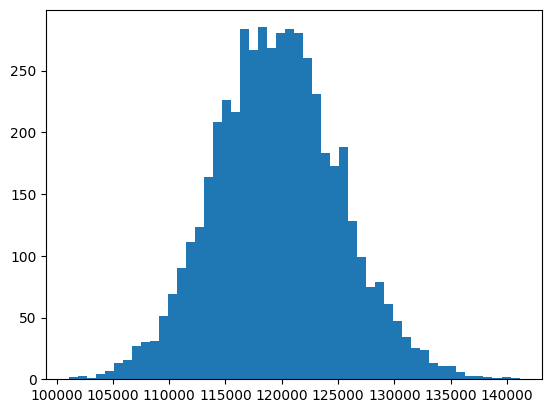

5591.133732291221


In [19]:
# A hypothesis:
# The mean annual compensation of the population of data scientists is $110,000
# The point estimate (sample statistic):

mean_comp_samp = stack_overflow['converted_comp'].mean()
print(mean_comp_samp)

import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['converted_comp']
        )
)

import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

std_error = np.std(so_boot_distn, ddof=1)
print(std_error)

In [ ]:
print(stack_overflow['converted_comp'].mean())

mean_comp_hyp = 110000

z_score = (mean_comp_samp - mean_comp_hyp) / std_error

print(z_score)


119574.71738168952
1.7124822692741866


Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()
late_shipments is available, and pandas is loaded as pd.

In [30]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

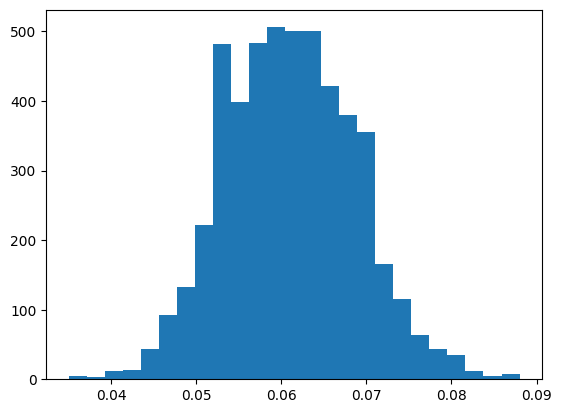

In [42]:
late_shipments['is_late'] = late_shipments['late'].apply(
    lambda x: 1 if x == 'Yes' else 0
)

late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            late_shipments.sample(frac=1, replace=True)['is_late']
        )
)

import matplotlib.pyplot as plt
plt.hist(late_shipments_boot_distn, bins=25)
plt.show()

In [43]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error


# Print z_score
print(z_score)

0.1304033772448466


#### **p-values**

1. Criminal trials

Two possible true states:
        1. Defendant committed the crime
        2. Defendant did not commit the crime
Two possible verdicts:
        1. Guilty
        2. Not guilty
    Initially the defendant is assumed to be not guilty
    
2. Age of first programming experience

age_first_code_cut classifies when Stack Overflow user first started programming
    "adult" means they started at 14 or older
    "child" means they started before 14
Previous research: 35% of software developers started programming as children
Evidence that a greater proportion of data scientists starting programming as children?

3. Definitions

A hypothesis is a statement about an unknown population parameter
A hypothesis test is a test of two competing hypotheses
The null hypothesis (H0 ) is the existing idea
The alternative hypothesis (Ha ) is the new "challenger" idea of the researcher
For our problem:
H0 : The proportion of data scientists starting programming as children is 35%
Ha : The proportion of data scientists starting programming as children is greater than 35%

4. Criminal trials vs. hypothesis testing

Either Ha or H0 is true (not both)
Initially, H0 is assumed to be true
The test ends in either "reject H0 " or "fail to reject H0 "
If the evidence from the sample is "significant" that Ha is true, reject H0 , else choose H0
Significance level is "beyond a reasonable doubt" for hypothesis testing

5. One-tailed and two-tailed tests

Hypothesis tests check if the sample statistics
lie in the tails of the null distribution

Test                                            Tails
alternative different from null             two-tailed
alternative greater than null               right-tailed
alternative less than null                  left-tailed

Ha : The proportion of data scientists starting
programming as children is greater than 35%
This is a right-tailed test

p-values: probability of obtaining a result,
assuming the null hypothesis is true

Large p-value, large support for H0
Statistic likely not in the tail of the null
distribution

Small p-value, strong evidence against H0
Statistic likely in the tail of the null
distribution

"p" in p-value → probability
"small" means "close to zero"

6. Calculating the z-score

prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

7. Calculating the p-value

norm.cdf() is normal CDF from scipy.stats .
Left-tailed test → use norm.cdf() .
Right-tailed test → use 1 - norm.cdf() .

from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)

In [53]:
stack_overflow['is_child'] = stack_overflow['age_first_code_cut'].apply(
    lambda x: 1 if x == 'child' else 0
)

first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
    # Step 2. Calculate point estimate
        np.mean(
            # Step 1. Resample
            stack_overflow.sample(frac=1, replace=True)['is_child']
        )
)

prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

prop_child_hyp = 0.35

std_error = np.std(first_code_boot_distn, ddof=1)

z_score = (prop_child_samp - prop_child_hyp) / std_error

print(prop_child_hyp)
print(std_error)
print(z_score)

from scipy.stats import norm
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
print(p_value)

0.35
0.010220641277929692
4.05255645499388
2.5330496868258834e-05


Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, 
, is that the proportion of late shipments is six percent.

The alternative hypothesis, 
, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

In [55]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 


0.4610291882398514


#### **Statistical significance**

1. p-value recap
p-values quantify evidence for the null hypothesis
Large p-value → fail to reject null hypothesis
Small p-value → reject null hypothesis
Where is the cutoff point?

2. Significance level
The significance level of a hypothesis test (α) is the threshold point for "beyond a
reasonable doubt"
Common values of α are 0.2 , 0.1 , 0.05 , and 0.01
If p ≤ α, reject H , else fail to reject H
α should be set prior to conducting the hypothesis test

3. Calculating the p-value
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

4. Making a decision

alpha = 0.05
print(p_value)
3.1471479512323874e-05
p_value <= alpha
True
Reject H0 in favor of HA

5. Confidence intervals

For a significance level of α, it's common to choose a confidence interval level of 1 - α
α = 0.05 → 95% confidence interval
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))
(0.37063246351172047, 0.41132242370632466)

6. Types of errors

                        Truly didn't commit crime       Truly committed crime
Verdict not guilty      correct                         they got away with it
Verdict guilty          wrongful conviction             correct


                        actual H0                        actual Ha
chosen H0               correct                         false negative
chosen Ha               false                           positive correct

False positives are Type I errors; false negatives are Type II errors.

7. Possible errors in our example

If p ≤ α, we reject H :
    A false positive (Type I) error: data scientists didn't start coding as children at a higher rate
If p > α, we fail to reject H :
    A false negative (Type II) error: data scientists started coding as children at a higher rate


    If the null hypothesis is true and you rejected it, you've committed a type I error.

In [58]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)
z_score = (prop_child_samp - prop_child_hyp) / std_error
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

print(p_value) 

print(p_value <= alpha)
## Reject H0 in favor of HA

2.5330496868258834e-05
True


In [59]:
import numpy as np
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))

(0.3715170278637771, 0.4113334807607252)


Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

In [60]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.077)


## **Two-Sample and ANOVA Tests (Module 02-054)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

## **Proportion Tests (Module 03-054)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

## **Non-Parametric Tests (Module 04-054)**

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [ ]:
display(

)

display(

)

display(

)

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [12]:
print('Perrenque!')

Perrenque!
